# Homework 2

## Moving Average

Calculate moving averages based on the values in each window:
<br>
[7, 8, 9,10, 9, 8, 7, 9,11,13,15,17,16,15,14,13,12,11,10, 9, 7, 5, 3,1]
</br>

For example, for 6 hours:

T(5) = (X=8) = (7+8+9+10+9+8)/6 = 8.5

T(6) = (X=7) = (8+9+10+9+8+7)/6 = 8.5

T(7) = (X=9) = (9+10+9+8+7+9)/6 = 8.67
  T(5) represent the first window (because 5 is the 6th element starting from 0) moving average, 8 is the value at the end of the window. When X = 8, the moving average is 8.5.
T(6) is the second window, 7 is the last value of the window. When X = 7 the moving average is 8.5
Then after calculating all these, you simply plot each moving average sequentially using a line plot.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = [7, 8, 9,10, 9, 8, 7, 9,11,13,15,17,16,15,14,13,12,11,10, 9, 7, 5, 3,1]

# Convert list to pandas Series
data = pd.Series(X)
# Calculate moving average for 6 hours window
six_hours = data.rolling(6).mean().dropna()

# Calculate moving average for 12 hours window
twelve_hours = data.rolling(12).mean().dropna()

print(f'Moving Average for 6 hours:\n{six_hours}')
print(f'\nMoving Average for 12 hours:\n{twelve_hours}')

Moving Average for 6 hours:
5      8.500000
6      8.500000
7      8.666667
8      9.000000
9      9.500000
10    10.500000
11    12.000000
12    13.500000
13    14.500000
14    15.000000
15    15.000000
16    14.500000
17    13.500000
18    12.500000
19    11.500000
20    10.333333
21     9.000000
22     7.500000
23     5.833333
dtype: float64

Moving Average for 12 hours:
11    10.250000
12    11.000000
13    11.583333
14    12.000000
15    12.250000
16    12.500000
17    12.750000
18    13.000000
19    13.000000
20    12.666667
21    12.000000
22    11.000000
23     9.666667
dtype: float64


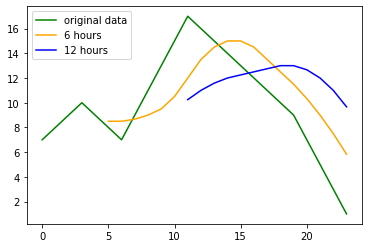

In [114]:
plt.plot(data,label='original data', color='green')
plt.plot( six_hours, label='6 hours', color='orange')
plt.plot(twelve_hours, label='12 hours', color='blue')
plt.legend(loc='upper left')

## Exponential moving average

Calculate exponential moving averages for 4th window:
<br>
[7, 8, 9,10, 9, 8, 7, 9,11,13,15,17,16,15,14,13,12,11,10, 9, 7, 5, 3,1]
</br>

EMA(i,m) = p*t(i) + (1-p)*EMA(i-1,m-1)<br>
EMA(i,1) = t(i)<br>
where i is value index (starting from 0 same as above), and you compute the EMA using m=4 because window size is 4.<br>
   For 4h window, the first window has 7,8,9,10 in it. We choose p = 0.5 as in the book, then:

EMA(3,4) = "Exponential Moving Average at X = 10 with window size 4" = $0.5*10+.5*EMA(2,3)$

                 = 0.5*10 + .5*(0.5*9+.5*EMA(1,2))

                 = 0.5*10+.5*(0.5*9+.5*(0.5*8+.5*(EMA(0,1)))

                =0.5*10+.5(0.5*9+.5*(0.5*8+.5*(7))) = 8.125

EMA(4,4) = "EMA at X = 9 with window size 4" = $0.5*9+.5(.5*10+.5*(.5*9+.5*8)) = 9.375$


After you compute all these you plot them sequentially

In [121]:
ema_result = data.ewm(span=4).mean()
ema_result

0      7.000000
1      7.625000
2      8.326531
3      9.095588
4      9.054129
5      8.611842
6      7.948537
7      8.376307
8      9.436468
9     10.870552
10    12.528346
11    14.320910
12    14.993424
13    14.996056
14    14.597446
15    13.958288
16    13.174840
17    12.304816
18    11.382833
19    10.429665
20     9.057769
21     7.434640
22     5.660770
23     3.796453
dtype: float64

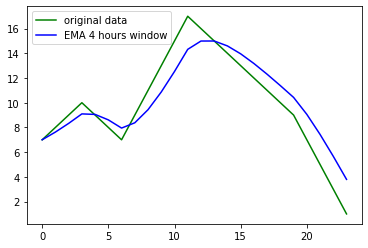

In [130]:
plt.plot(data,label='original data', color='green')
plt.plot(ema_result,label='EMA 4 hours window', color='blue')
plt.legend(loc='upper left')
plt.show()